In [159]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
#Reading the input excel
df_Rohit = pd.read_excel("Rohit_Final.xlsx")

In [119]:
df_Rohit.head()

,Commentary,Runs,Delivery_Length,Delivery_Line,Shot_Type,Run/NoRun,Bowler_Type,Bowler_Name,Avg_Ball_Speed,MatchID,...,Beaten/NotBeaten,Home_Away,Good_Bad_Shot,Opponent,Stadium,Shot_Zone,Delivery_Number,Toss,TossDecision,D/N
2,"Morne Morkel to Rohit, no run, stays in the cr...",0,Short,outside_stumps,Defensive_shot,norun,right arm fast,Morne Morkel,139.2,19160,...,not_beaten,away,bad,South Africa,Kingsmead,Unknown,29,0,Batting,DN
3,"Morne Morkel to Rohit, 2 runs, <b>almost dragg...",2,Short,wicket_to_wicket,Edge,run,right arm fast,Morne Morkel,139.2,19160,...,beaten,away,bad,South Africa,Kingsmead,FineLeg,28,0,Batting,DN
4,"Rabada to Rohit, 1 run, good comeback from Rab...",1,GoodLength,outside_stumps,Late_Cut,run,right arm fast,Rabada,138.3,19160,...,beaten,away,good,South Africa,Kingsmead,Point,27,0,Batting,DN
5,"Rabada to Rohit, no run, Rohit must be cursing...",0,Full_toss,outside_stumps,Pull_hook,norun,right arm fast,Rabada,138.3,19160,...,not_beaten,away,bad,South Africa,Kingsmead,Midwicket,26,0,Batting,DN
6,"Rabada to Rohit, no run, pacy back of a length...",0,Short,wicket_to_wicket,Defensive_shot,norun,right arm fast,Rabada,138.3,19160,...,not_beaten,away,bad,South Africa,Kingsmead,Unknown,25,0,Batting,DN


In [120]:
df_Rohit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 2 to 0
Data columns (total 22 columns):
Commentary          2192 non-null object
Runs                2192 non-null int64
Delivery_Length     2192 non-null object
Delivery_Line       2192 non-null object
Shot_Type           2192 non-null object
Run/NoRun           2192 non-null object
Bowler_Type         2192 non-null object
Bowler_Name         2192 non-null object
Avg_Ball_Speed      2192 non-null float64
MatchID             2192 non-null int64
Dismissal           2192 non-null int64
Dismissal_Type      35 non-null object
Beaten/NotBeaten    2192 non-null object
Home_Away           2192 non-null object
Good_Bad_Shot       2192 non-null object
Opponent            2192 non-null object
Stadium             2192 non-null object
Shot_Zone           2192 non-null object
Delivery_Number     2192 non-null int64
Toss                2192 non-null int64
TossDecision        2192 non-null object
D/N                 2192 non-null object


# Exploratory Data Analysis

In [141]:
#Average run rate per over for a given opponent
df1 = df_Rohit.groupby(['Opponent'])['Runs'].sum()/df_Rohit.groupby(['Opponent'])['Run/NoRun'].count()*6
df1

Opponent
Australia               6.209497
Bangladesh              6.571429
New Zealand             5.400000
Pakistan                4.439024
South Africa            4.901786
Sri Lanka               6.308748
United Arab Emirates    8.666667
dtype: float64

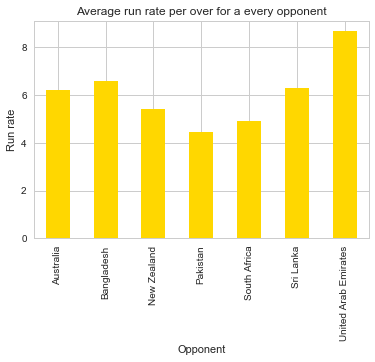

In [143]:
df1.plot(kind = 'bar', title = 'Average run rate per over for a every opponent', color = 'gold')
plt.ylabel('Run rate')
plt.show()

In [134]:
#Average run rate per over for a given ball type
df2 = df_Rohit.groupby(['Bowler_Type'])['Runs'].sum()/df_Rohit.groupby(['Bowler_Type'])['Run/NoRun'].count()*6
df2

Bowler_Type
left arm chinaman        4.500000
left arm fast medium     4.805687
left arm medium          6.000000
left arm orthodox        5.970149
right arm fast           5.186207
right arm fast medium    6.377419
right arm leg break      7.534884
right arm medium         6.543210
right arm off break      6.181034
dtype: float64

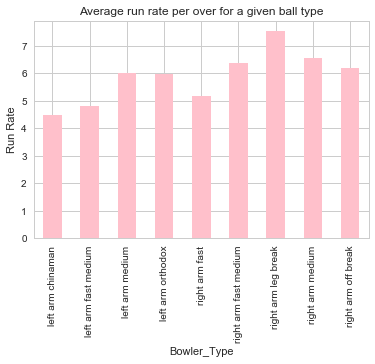

In [140]:
df2.plot(kind = 'bar', title = 'Average run rate per over for a given ball type', color = 'pink')
plt.ylabel('Run Rate')
plt.show()

# Inference 1: 
**In a crunch situation if there is a need to pick up a bowler who needs to defend runs, it can be seen from the graph that a left arm bowler would be much effective as compared to right arm.**

In [174]:
#Strike rate per 100 balls
df3 = (df_Rohit.groupby(['Delivery_Length'])['Runs'].sum()/df_Rohit.groupby(['Delivery_Length'])['Commentary'].count())*100
df3

Delivery_Length
Full           70.451011
Full_toss     270.000000
GoodLength     98.252427
Short         109.914321
Unknown       116.384181
dtype: float64

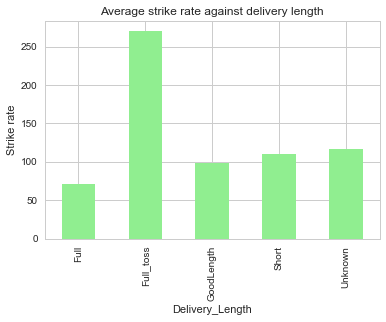

In [146]:
df3.plot(kind = 'bar', title = 'Average strike rate against delivery length', color = 'lightgreen')
plt.ylabel('Strike rate')
plt.show()

# Obvious Inference2:
** Full Toss ball will be penalized, plays short balls well as compared to full length**

In [175]:
# % of runs scored in differnt shot zone
(df_Rohit.groupby(['Shot_Zone'])['Runs'].sum()/df_Rohit['Runs'].sum())*100

Shot_Zone
Cover        12.989406
FineLeg       9.166283
LongOff       7.646246
LongOn       14.785813
Midwicket    12.068171
Point         9.719023
SquareLeg    10.317826
ThirdMan      9.719023
Unknown      13.588208
Name: Runs, dtype: float64

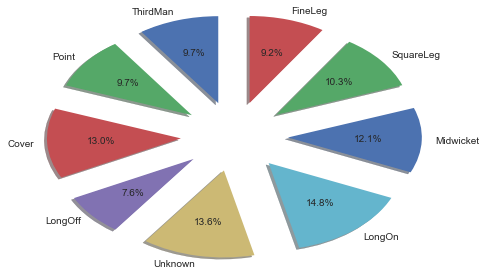

In [151]:
labels = ['ThirdMan', 'Point', 'Cover', 'LongOff', 'Unknown', 'LongOn', 'Midwicket',  'SquareLeg', 'FineLeg']
sizes = ['9.719023', '9.719023', '12.989406', '7.646246', '13.588208', '14.785813', '12.068171', '10.317826', '9.166283']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4)
wedges, patches, texts = plt.pie(sizes, labels=labels, shadow=True, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

# Inference
**Most of the runs have been scored in the Long On region, comparatively Long Off is least scored region**

In [147]:
#% of good shot and bad shots played for each opponent
(df_Rohit.groupby(['Opponent','Good_Bad_Shot']).size()/df_Rohit.groupby(['Opponent'])['Good_Bad_Shot'].count())*100

Opponent              Good_Bad_Shot
Australia             bad              67.178771
                      good             32.821229
Bangladesh            bad              55.026455
                      good             44.973545
New Zealand           bad              71.818182
                      good             28.181818
Pakistan              bad              75.609756
                      good             24.390244
South Africa          bad              77.678571
                      good             22.321429
Sri Lanka             bad              69.125214
                      good             30.874786
United Arab Emirates  bad              77.777778
                      good             22.222222
dtype: float64

In [172]:
#Subsetting to get only dismissal data
df_RohitDismissal = df_Rohit.loc[(df_Rohit.Dismissal == 1),:]

df_Rohit_col = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type', 'Dismissal_Type']

for i in df_Rohit_col:
    print(df_RohitDismissal[i].value_counts())

right arm fast           11
right arm fast medium    10
left arm fast medium      6
right arm medium          4
right arm off break       2
right arm leg break       1
left arm orthodox         1
Name: Bowler_Type, dtype: int64
Short         15
GoodLength    12
Full           8
Name: Delivery_Length, dtype: int64
outside_stumps      17
wicket_to_wicket    17
Unknown              1
Name: Delivery_Line, dtype: int64
Edge              9
Pull_hook         8
Unknown           5
Sweep             3
Flick             3
Late_Cut          2
Drive             2
No_shot           2
Defensive_shot    1
Name: Shot_Type, dtype: int64
 Caught!!           25
 Lbw!!               5
 Caught&Bowled!!     2
 Bowled!!            2
 Run Out!!           1
Name: Dismissal_Type, dtype: int64


# Inference:
**Probability of getting a wicket of Rohit increases by bowling a Short ball outside off stump close to the body or good length delivery outside the off stump since most caught dismissal are from Edge's**

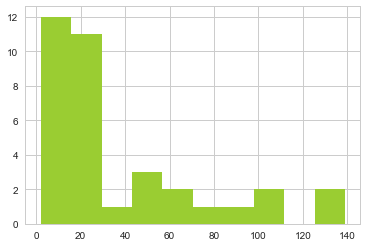

In [185]:
df_RohitDismissal['Delivery_Number'].hist(color = 'yellowgreen')

# Inference:
**From the data it can be seen that the probability of getting Rohit Sharma's wicket decreases drastically once he has played more than 30 balls**

# Vizualization

Target variables distribution

Text(0,0.5,'Count of balls')

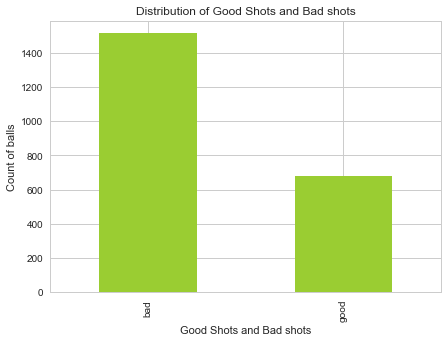

In [157]:
#Distribution of Good Shots and Bad shots
plt.figure(figsize=(7,5))
y = ['Good_Bad_Shot']
df_Rohit['Good_Bad_Shot'].value_counts().plot(kind='bar',color=['yellowgreen'])
plt.title("Distribution of Good Shots and Bad shots")
plt.xlabel("Good Shots and Bad shots")
plt.ylabel("Count of balls")

Text(0,0.5,'Count of balls')

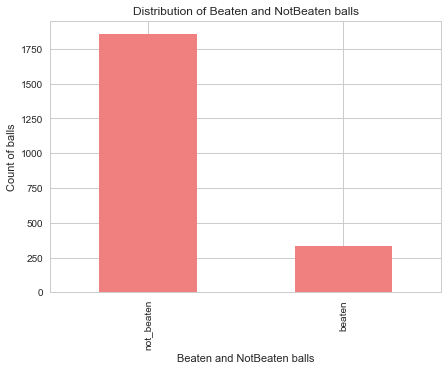

In [129]:
#Distribution of Beaten and NotBeaten balls
plt.figure(figsize=(7,5))
df_Rohit['Beaten/NotBeaten'].value_counts().plot(kind='bar',color=['lightcoral'])
plt.title("Distribution of Beaten and NotBeaten balls")
plt.xlabel("Beaten and NotBeaten balls")
plt.ylabel("Count of balls")

Text(0,0.5,'Count of Type of dismissal')

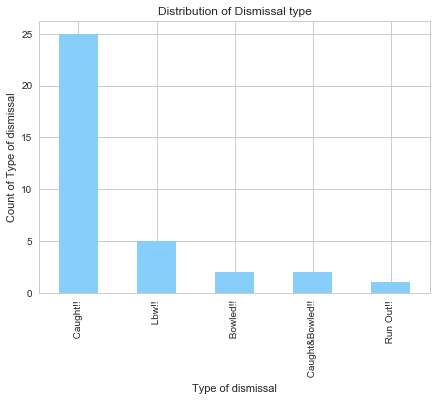

In [130]:
#Distribution of Dismissal type
plt.figure(figsize=(7,5))
df_Rohit['Dismissal_Type'].value_counts().plot(kind='bar',color=['lightskyblue'])
plt.title("Distribution of Dismissal type")
plt.xlabel("Type of dismissal")
plt.ylabel("Count of Type of dismissal")

# Vizualization of all the independent variables against output variables.

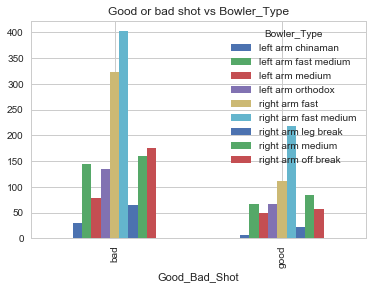

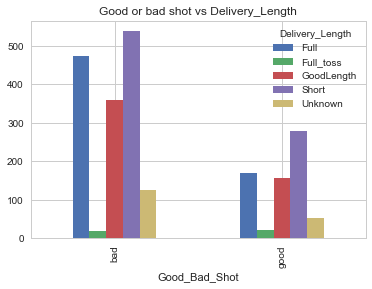

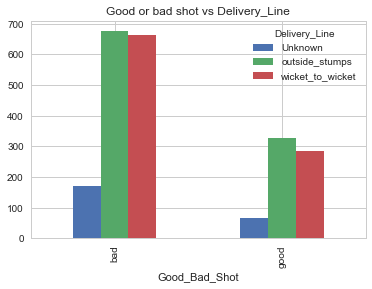

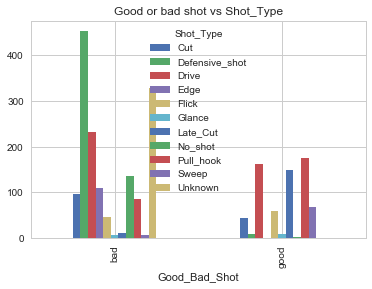

In [173]:
df_Rohit2 = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type']
for i in df_Rohit2:
    if(i!='Good_Bad_Shot'): 
        cross_tab = pd.crosstab(df_Rohit['Good_Bad_Shot'],df_Rohit[i])
        cross_tab.plot(kind='bar')
        plt.title("Good or bad shot vs"+" "+i)

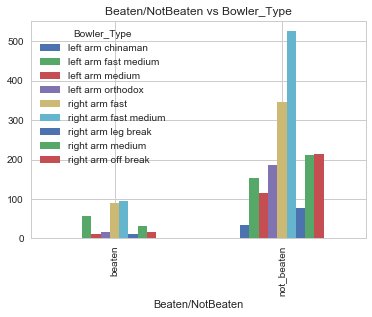

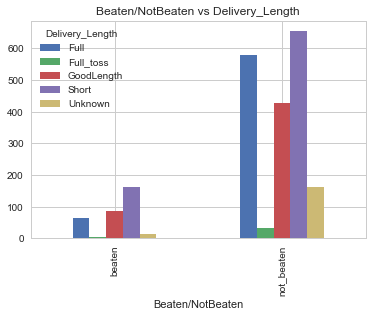

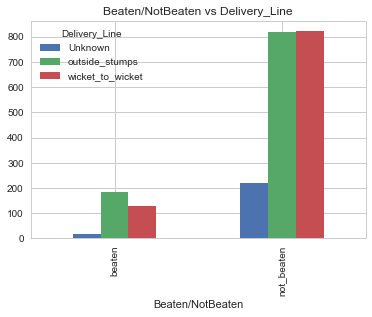

In [177]:
df_Rohit3 = ['Bowler_Type','Delivery_Length','Delivery_Line']
for i in df_Rohit3:
    if(i!='Beaten/NotBeaten'): 
        cross_tab = pd.crosstab(df_Rohit['Beaten/NotBeaten'],df_Rohit[i])
        cross_tab.plot(kind='bar')
        plt.title("Beaten/NotBeaten vs"+" "+i)